In [18]:
import yfinance as yf

import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

# IBM Data Science : Python Project for Data Science

Author : Raffel Ravionaldo

## Question 1 - Extracting Tesla Stock Data Using yfinance

Use the `Ticker` function enter the ticker symbol ofthe stock we want to extract data on to create a ticker object. The stock is Tesla and it's ticker symbol is `TSLA`

In [2]:
tesla = yf.Ticker('TSLA')

Using the ticker object and the function history extract stock information and save it in a dataframe named tesla_data. Set the period parameter to max so we get information for the maximum amount of time.

Reset the index using the reset_index() function on the tesla_data DataFrame and display the first five rows of the tesla_data dataframe using the head function.

In [3]:
tesla_data = tesla.history(period='max').reset_index()
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [4]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
data = requests.get(url).text

In [5]:
soup = BeautifulSoup(data, 'html5lib')

In [6]:
tesla_revenue_annual  = pd.DataFrame(columns = ['Year', 'Revenue'])
tesla_revenue_quarter = pd.DataFrame(columns= ['Date', 'Quarterly Revenue'])

tesla_annual_data  = soup.find_all('tbody')[0]
tesla_quarter_data = soup.find_all('tbody')[1]

for rows in tesla_quarter_data.find_all('tr'):
    col = rows.find_all('td')
    date = col[0].text
    revenue = col[1].text.replace("$", '').replace(",","")
    
    tesla_revenue_quarter = tesla_revenue_quarter.append({"Date": date, "Quarterly Revenue": revenue}, ignore_index = True)
    
for rows in tesla_annual_data.find_all('tr'):
    col = rows.find_all('td')
    date = col[0].text
    revenue = col[1].text.replace("$", '').replace(",","")
    
    tesla_revenue_annual = tesla_revenue_annual.append({"Year": date, "Revenue": revenue}, ignore_index = True)

In [7]:
tesla_revenue_annual.head(2)

,Year,Revenue
0,2021,53823
1,2020,31536


In [8]:
tesla_revenue_quarter.head(2)

,Date,Quarterly Revenue
0,2022-09-30,21454
1,2022-06-30,16934


## Question 3 - Extracting GameStop Stock Data Using yfinance

Use the `Ticker` function enter the ticker symbol ofthe stock we want to extract data on to create a ticker object. The stock is GameStop and it's ticker symbol is `GME`

In [9]:
GameStop = yf.Ticker('GME')

Using the ticker object and the function history extract stock information and save it in a dataframe named GME_data. Set the period parameter to max so we get information for the maximum amount of time.

Reset the index using the reset_index() function on the GME_data DataFrame and display the first five rows of the tesla_data dataframe using the head function.

In [10]:
GME_data = GameStop.history(period='max').reset_index()
GME_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712708,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [11]:
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
data = requests.get(url).text

In [12]:
soup = BeautifulSoup(data, 'html5lib')

In [13]:
gme_revenue_annual  = pd.DataFrame(columns = ['Year', 'Revenue'])
gme_revenue_quarter = pd.DataFrame(columns= ['Date', 'Quarterly Revenue'])

gme_annual_data  = soup.find_all('tbody')[0]
gme_quarter_data = soup.find_all('tbody')[1]

for rows in gme_quarter_data.find_all('tr'):
    col = rows.find_all('td')
    date = col[0].text
    revenue = col[1].text.replace("$", '').replace(",","")
    
    gme_revenue_quarter = gme_revenue_quarter.append({"Date": date, "Quarterly Revenue": revenue}, ignore_index = True)
    
for rows in tesla_annual_data.find_all('tr'):
    col = rows.find_all('td')
    date = col[0].text
    revenue = col[1].text.replace("$", '').replace(",","")
    
    gme_revenue_annual = gme_revenue_annual.append({"Year": date, "Revenue": revenue}, ignore_index = True)

In [14]:
gme_revenue_annual.head(2)

,Year,Revenue
0,2021,53823
1,2020,31536


In [15]:
gme_revenue_quarter.head(2)

,Date,Quarterly Revenue
0,2022-10-31,1186
1,2022-07-31,1136


## Define Graphing Function

In [129]:
def make_graph(stock_data, revenue_data, stock):
    fig, ax = plt.subplots(2, 1, figsize=(9,6))
    
    revenue_data['Date'] = revenue_data['Date'].astype('datetime64[ns]')
    revenue_data['Year'] = revenue_data['Date'].dt.year
    revenue_data['Month'] = revenue_data['Date'].dt.month
    rev_data = revenue_data[revenue_data['Year'] >= 2020]
    quarter_year = []
    
    max_month = rev_data['Month'].max()
    
    if max_month != 12:
        month = 12 - max_month
        rev_data['Month'] = rev_data['Month'] + month
    
    for x,y in enumerate (rev_data['Month']):
        Month = rev_data['Month'][x]
        if Month == 3:
            quarter = "Q1 " + str(rev_data['Year'][x])
        elif Month == 6 :
            quarter = "Q2 " + str(rev_data['Year'][x])
        elif Month == 9 :
            quarter = "Q3 " + str(rev_data['Year'][x])
        elif Month == 12 :
            quarter = "Q4 " + str(rev_data['Year'][x])
        quarter_year.append(quarter)
        
    rev_data['Quarter'] = quarter_year
    rev_data = rev_data.sort_values(by='Date')
    rev_data['Quarterly Revenue'] = rev_data['Quarterly Revenue'].astype(int)
    
    ax[0].plot(stock_data['Date'], stock_data['Close'])
    ax[1].plot(rev_data['Quarter'], rev_data['Quarterly Revenue'])
    
    ax[0].set_xlabel('Date')
    ax[0].set_ylabel('Price ($US)')
    ax[0].set_title('Historical Share Price of ' + stock)
    
    ax[1].set_xlabel('Quarter')
    ax[1].set_ylabel('Revenue ($US)')
    ax[1].set_title('Historical Revenue of ' + stock)
    
    plt.tight_layout()

## Question 5 - Tesla Stock and Revenue Dashboard

C:\Users\RAFFEL~1\AppData\Local\Temp/ipykernel_21624/3315478690.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



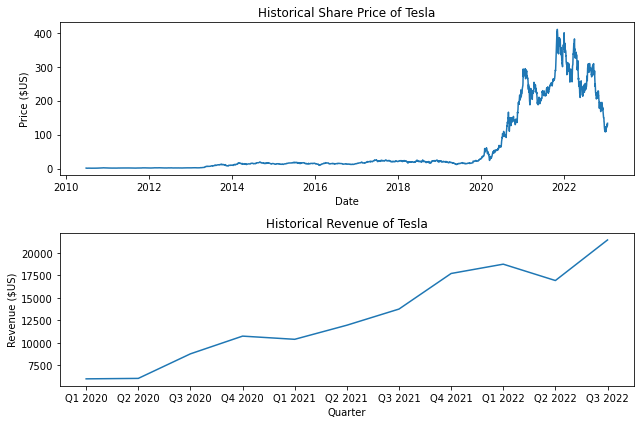

In [130]:
make_graph(tesla_data, tesla_revenue_quarter, 'Tesla')

## Question 6 - GameStop Stock and Revenue Dashboard

C:\Users\RAFFEL~1\AppData\Local\Temp/ipykernel_21624/3315478690.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\RAFFEL~1\AppData\Local\Temp/ipykernel_21624/3315478690.py:28: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



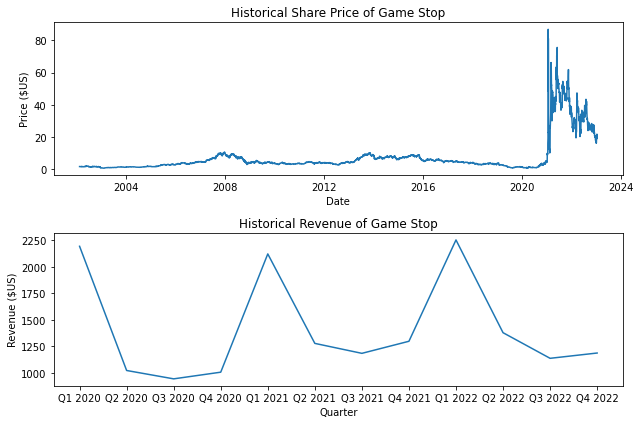

In [131]:
make_graph(GME_data, gme_revenue_quarter, 'Game Stop')